# MT Penetration Depth Profiles over 2DLine and 3DGrid

In [243]:
import sys 
import os
import glob
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[20,10]

import mtpy.core.mt as mt
import mtpy.modeling.occam2d_rewrite as occam2d_new


In [244]:
# Windows File system
edi_dir=r"E:/Githubz/mtpy2/tests/data/edifiles/"
edi_dir=r"E:\Datasets\IEB_MT"

#edi_dir=r"E:/Githubz/mtpy2/examples/data/edi2"
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75098\EDI_files"  # not same periods
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75099_Youanmi\EDI Files\bb_edi\YN3_edi_bb"
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75099_Youanmi\EDI Files\lp_edi"  # not same periods

# Linux OS files
#edi_dir="/Softlab/Githubz/mtpy2/tests/data/edifiles/"
#edi_dir="/Softlab/Githubz/mtpy2/examples/data/edi2"  #edi_files/"

edifiles = glob.glob(os.path.join(edi_dir, '*.edi'))

print (edifiles)

['E:\\Datasets\\IEB_MT\\IEB1010A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1012A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1014A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1016A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1018A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1110A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1112A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1114A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1116A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1118A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1210A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1212A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1214A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1216A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1218A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1310A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1312A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1314A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1316A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1318A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1410A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1412A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1414A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1416A1.edi', 'E:\\Datasets\\IEB_MT\\IEB1418A1.edi']


In [245]:
2539*3.98

10105.22

2017-02-15 16:12:31,302 - mtpy.core.edi - INFO - Reading the edi file E:\Datasets\IEB_MT\IEB1010A1.edi
2017-02-15 16:12:31,303 - mtpy.core.edi - INFO - Converting Spectra to Impedance and Tipper
2017-02-15 16:12:31,305 - mtpy.core.edi - INFO - Check to make sure input channel list is correct if
2017-02-15 16:12:31,305 - mtpy.core.edi - INFO -  the data looks incorrect.
Need to input frequency list
Need to input frequency list
2017-02-15 16:12:31,358 - mtpy.core.edi - INFO - Read in edi file for station IEB114-010A
2017-02-15 16:12:31,374 - mtpy.core.edi - INFO - Reading the edi file E:\Datasets\IEB_MT\IEB1012A1.edi
2017-02-15 16:12:31,378 - mtpy.core.edi - INFO - Converting Spectra to Impedance and Tipper
2017-02-15 16:12:31,382 - mtpy.core.edi - INFO - Check to make sure input channel list is correct if
2017-02-15 16:12:31,384 - mtpy.core.edi - INFO -  the data looks incorrect.
Need to input frequency list
Need to input frequency list
2017-02-15 16:12:31,441 - mtpy.core.edi - INFO - R

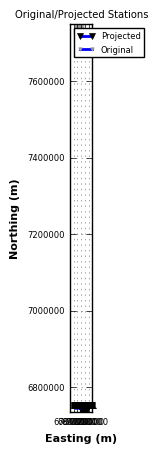

In [246]:
# stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
# pr = occam2d_new.Profile(edi_path=edi_dir, station_list=stations)

pr = occam2d_new.Profile(edi_path=edi_dir)
pr.generate_profile()
# set station labels to only be from 1st to 4th index 
# of station name
      
pr.plot_profile(station_id=[0,4])

In [247]:
 pr.station_locations

array([     0.        ,    226.74994227,    381.54320663,    631.70989926,
          818.44889267,   4074.11747164,   4267.91122067,   4476.18896801,
         4678.52709088,   4860.35184599,   8122.87079926,   8334.03880347,
         8545.02225161,   8722.24632018,   8919.67096841,  12181.82657559,
        12392.09517867,  12575.52847721,  12796.85633062,  12962.09234403,
        16222.80069917,  16444.53284961,  16635.65220701,  16824.88674987,
        17026.87570157])

In [248]:
pr.edi_list

In [249]:
# See http://localhost:8888/notebooks/examples/notebooks/Apparent_Resistivity_Penetration_Depth.ipynb
# def plotbar_pen_depth(per_index, edifiles):

per_index=2
    
scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))

#per_index=0,1,2,....    
periods=[] 

app_resis=[]

stations=[]
    
for mt_obj in pr.edi_list:

    # the attribute Z
    zeta=mt_obj.Z
    

    if per_index>=len(zeta.freq):
        raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")

    per=1.0/zeta.freq[per_index]
    periods.append(per)

    penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
    app_resis.append(penetration_depth)

    stations.append(mt_obj.station)
    

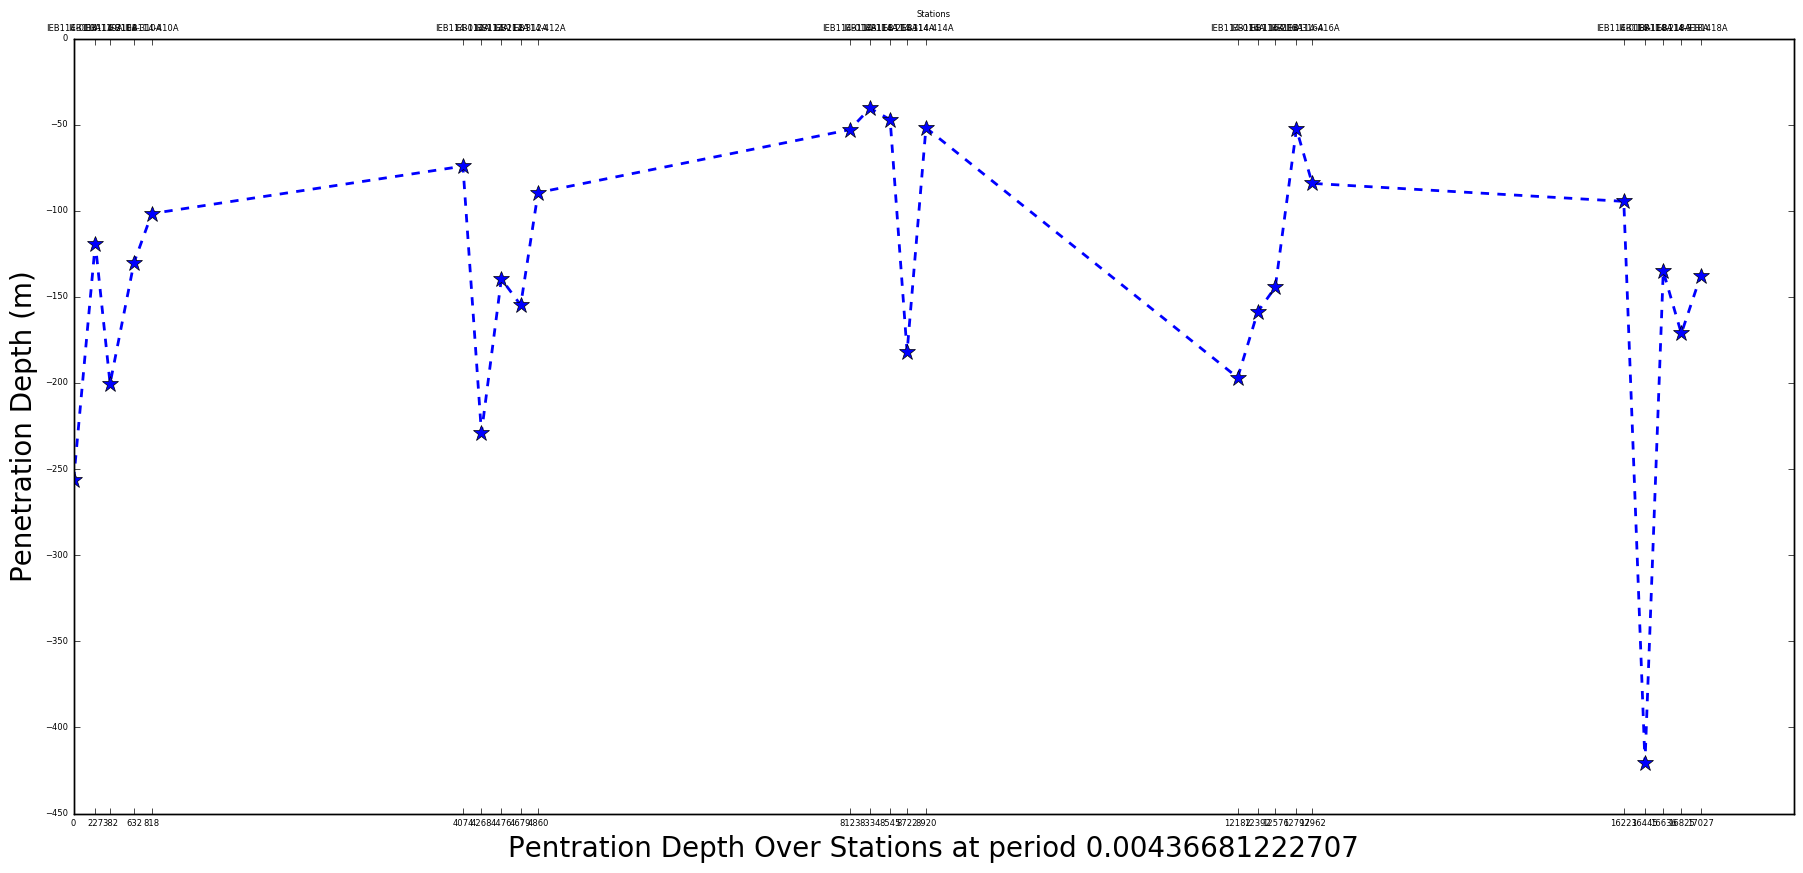

In [250]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


#plt.bar(index, app_resis, color='#000000')
ax1.plot(pr.station_locations, app_resis, '--*', markersize="12", linewidth="2", label="Penetration Depth")
# plt.xaxis.tick_top()
# plt.set_xlabel('X LABEL')    
# plt.xaxis.set_label_position('top') 

ax1.set_xlabel('Pentration Depth Over Stations at period %s'%periods[0],fontsize=20)
ax1.set_xticks(pr.station_locations)
ax1.set_ylabel('Penetration Depth (m)', fontsize=20)


ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pr.station_locations)
ax2.set_xticklabels(stations)
ax2.set_xlabel(r"Stations")

#plt.show()

In [251]:
#http://stackoverflow.com/questions/10514315/how-to-add-a-second-x-axis-in-matplotlib


# import numpy as np
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twiny()

# X = np.linspace(0,1,1000)
# Y = np.cos(X*20)

# ax1.plot(X,Y)
# ax1.set_xlabel(r"Original x-axis: $X$")
# ax1.grid(True)
# new_tick_locations = np.array([.2, .5, .9])

# def tick_function(X):
#     V = 1/(1+X)
#     return ["%.3f" % z for z in V]

# ax2.set_xlim(ax1.get_xlim())
# ax2.set_xticks(new_tick_locations)
# ax2.set_xticklabels(tick_function(new_tick_locations))
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

# plt.show()


In [252]:
# plt.plot?

#plt.legend?

#plt.xticks?
#OR
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



In [253]:
# pr.geoelectric_strike = 45 # preset a rotation angle

# pr.generate_profile()

# pr.plot_profile()

In [254]:
stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
stations

['15124A', '15125A', '15126A', '15127A', '15128A', '15129A', '15130A']

# 3D-plot penetration depth profile over stations

    - For a given fre/per index of a set of edifiles, the (lat, lon) are extracted and bounding box calculated.
    - A pmesh is made with None value initially for all pixels, reset the pixels value according to the MT station pen-depth. 
    - Finally show the pcolor plot

In [255]:
def get_penetration_depth(per_index, edifiles):
    """ input period index and a list of edi files,
    return tuple of lists (stations, periods, penetrationdepth, lat-lons-pairs)
    """
    
    scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
    
    #per_index=0,1,2,....    
    periods=[] 
    
    pendep=[]
    
    stations=[]
    
    latlons=[]
    
    for afile in edifiles:
        mt_obj = mt.MT(afile)
        
        latlons.append((mt_obj.lat, mt_obj.lon))
        
    
        # the attribute Z
        zeta=mt_obj.Z
        
        if per_index>=len(zeta.freq):
            raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")
        
        per=1.0/zeta.freq[per_index]
        periods.append(per)
       
        penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
        pendep.append(penetration_depth)
        
        stations.append(mt_obj.station)
        

    return (stations,periods,pendep, latlons )

In [256]:
(stations,periods,pendep, latlons )=get_penetration_depth(10, edifiles)

2017-02-15 16:12:36,236 - mtpy.core.edi - INFO - Reading the edi file E:\Datasets\IEB_MT\IEB1010A1.edi
2017-02-15 16:12:36,239 - mtpy.core.edi - INFO - Converting Spectra to Impedance and Tipper
2017-02-15 16:12:36,240 - mtpy.core.edi - INFO - Check to make sure input channel list is correct if
2017-02-15 16:12:36,242 - mtpy.core.edi - INFO -  the data looks incorrect.
Need to input frequency list
Need to input frequency list
2017-02-15 16:12:36,298 - mtpy.core.edi - INFO - Read in edi file for station IEB114-010A
2017-02-15 16:12:36,311 - mtpy.core.edi - INFO - Reading the edi file E:\Datasets\IEB_MT\IEB1012A1.edi
2017-02-15 16:12:36,312 - mtpy.core.edi - INFO - Converting Spectra to Impedance and Tipper
2017-02-15 16:12:36,312 - mtpy.core.edi - INFO - Check to make sure input channel list is correct if
2017-02-15 16:12:36,313 - mtpy.core.edi - INFO -  the data looks incorrect.
Need to input frequency list
Need to input frequency list
2017-02-15 16:12:36,371 - mtpy.core.edi - INFO - R

In [257]:
stations

['IEB114-010A',
 'IEB114-012A',
 'IEB114-014A',
 'IEB114-016A',
 'IEB114-018A',
 'IEB114-110A',
 'IEB114-112A',
 'IEB114-114A',
 'IEB114-116A',
 'IEB114-118A',
 'IEB114-210A',
 'IEB114-212A',
 'IEB114-214A',
 'IEB114-216A',
 'IEB114-218A',
 'IEB114-310A',
 'IEB114-312A',
 'IEB114-314A',
 'IEB114-316A',
 'IEB114-318A',
 'IEB114-410A',
 'IEB114-412A',
 'IEB114-414A',
 'IEB114-416A',
 '14-IEB1418A']

In [258]:
periods  # All must be of the same value across stations

[0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806]

In [259]:
pendep

[-569.20278828778271,
 -201.43581518003054,
 -171.75273157615447,
 -419.52541469901882,
 -246.54876870385567,
 -304.86981560839126,
 -597.08844370316945,
 -92.638817518240444,
 -371.91521706857088,
 -786.42686526370221,
 -422.00196343276696,
 -335.06314601236363,
 -150.89454246816103,
 -353.07444045603245,
 -321.1537332218661,
 -298.56826857753447,
 -359.83942949103704,
 -478.07414049565324,
 -152.52593259529908,
 -409.85293515994556,
 -258.10839010953845,
 -233.63228033240932,
 -164.23431972962626,
 -242.78370872438754,
 -301.36408499562231]

In [260]:
latlons

[(-20.590083333333332, 136.77222222222224),
 (-20.591916666666666, 136.81136111111113),
 (-20.592444444444443, 136.85022222222221),
 (-20.59347222222222, 136.88919444444443),
 (-20.593694444444445, 136.92797222222222),
 (-20.546222222222223, 136.77325000000002),
 (-20.54677777777778, 136.81202777777779),
 (-20.546694444444444, 136.85102777777777),
 (-20.547444444444444, 136.8899722222222),
 (-20.54813888888889, 136.9288611111111),
 (-20.50111111111111, 136.77355555555556),
 (-20.50161111111111, 136.81283333333334),
 (-20.502027777777776, 136.8518611111111),
 (-20.502694444444444, 136.89052777777778),
 (-20.503138888888888, 136.92947222222222),
 (-20.456055555555555, 136.77477777777779),
 (-20.45647222222222, 136.81358333333336),
 (-20.456972222222223, 136.8523611111111),
 (-20.457833333333333, 136.89144444444443),
 (-20.45775, 136.93005555555555),
 (-20.41086111111111, 136.7753888888889),
 (-20.411388888888887, 136.8141388888889),
 (-20.411916666666666, 136.85305555555556),
 (-20.41227

In [261]:
def get_bounding_box(latlons):
    """ get min max lat lon from the list of lat-lon-pairs points"""
    lats=[tup[0] for tup in latlons]
    lons=[tup[1] for tup in latlons]

    minlat=min(lats)
    maxlat=max(lats)

    print(minlat, maxlat)

    minlon= min(lons)
    maxlon= max(lons)

    print(minlon, maxlon)
    
    return ((minlon,maxlon), (minlat, maxlat))

In [262]:
bbox=get_bounding_box(latlons)

(-20.593694444444445, -20.41086111111111)
(136.77222222222224, 136.93077777777776)


In [263]:
bbox

((136.77222222222224, 136.93077777777776),
 (-20.593694444444445, -20.41086111111111))

# Make a gridded Image with suitable pixel size/resolution

In [264]:
xgrids= bbox[0][1] - bbox[0][0]
ygrids= bbox[1][1] - bbox[1][0]

print(xgrids, ygrids)

#Pixel size in Degree:  0.001=100meters, 0.01=1KM 1deg=100KM

pixelsize=0.002  #Degree 0.001=100meters, 0.01=1KM 1deg=100KM

nx= int(np.ceil(xgrids/pixelsize))
ny= int(np.ceil(ygrids/pixelsize))


print(nx, ny)

(0.15855555555552314, 0.18283333333333474)
(80, 92)


In [265]:
# make an image bigger than the (nx, ny)   
pad=4

nx2= nx + pad
ny2= ny+ pad

# Z = 0.0* np.random.random((nx2,ny2))   # Test data
# Z=  np.ones((nx2,ny2))
zdep=   np.zeros((ny2,nx2))
# Z[10, 10]=12
# Z[11, 20]=20
# Z[13, 15]=30

zdep[:,:]=np.nan

zdep.shape

(96L, 84L)

In [266]:
round(3.49)

3.0

In [267]:
offset=0
minlat= bbox[1][0]
minlon= bbox[0][0]
# LL_lat= minlat -offset*pixelsize
# LL_lon= minlon -offset*pixelsize

# UR_lat=maxlat + offset*pixelsize
# UR_lon= maxlon + offset*pixelsize

def get_index(lat, lon, offset=1):
    index_x = (lon - minlon)/pixelsize
    index_y= (lat- minlat)/pixelsize
    
    ix=int(round(index_x))
    iy=int(round(index_y))
    
    print (ix, iy)
    
    return(ix+offset, iy+offset)


In [268]:
for iter, pair in enumerate(latlons):
    print pair
    (xi,yi)= get_index(pair[0], pair[1])
    zdep[zdep.shape[0]-yi,xi] = np.abs(pendep[iter])

(-20.590083333333332, 136.77222222222224)
(0, 2)
(-20.591916666666666, 136.81136111111113)
(20, 1)
(-20.592444444444443, 136.85022222222221)
(39, 1)
(-20.59347222222222, 136.88919444444443)
(58, 0)
(-20.593694444444445, 136.92797222222222)
(78, 0)
(-20.546222222222223, 136.77325000000002)
(1, 24)
(-20.54677777777778, 136.81202777777779)
(20, 23)
(-20.546694444444444, 136.85102777777777)
(39, 24)
(-20.547444444444444, 136.8899722222222)
(59, 23)
(-20.54813888888889, 136.9288611111111)
(78, 23)
(-20.50111111111111, 136.77355555555556)
(1, 46)
(-20.50161111111111, 136.81283333333334)
(20, 46)
(-20.502027777777776, 136.8518611111111)
(40, 46)
(-20.502694444444444, 136.89052777777778)
(59, 46)
(-20.503138888888888, 136.92947222222222)
(79, 45)
(-20.456055555555555, 136.77477777777779)
(1, 69)
(-20.45647222222222, 136.81358333333336)
(21, 69)
(-20.456972222222223, 136.8523611111111)
(40, 68)
(-20.457833333333333, 136.89144444444443)
(60, 68)
(-20.45775, 136.93005555555555)
(79, 68)
(-20.4108

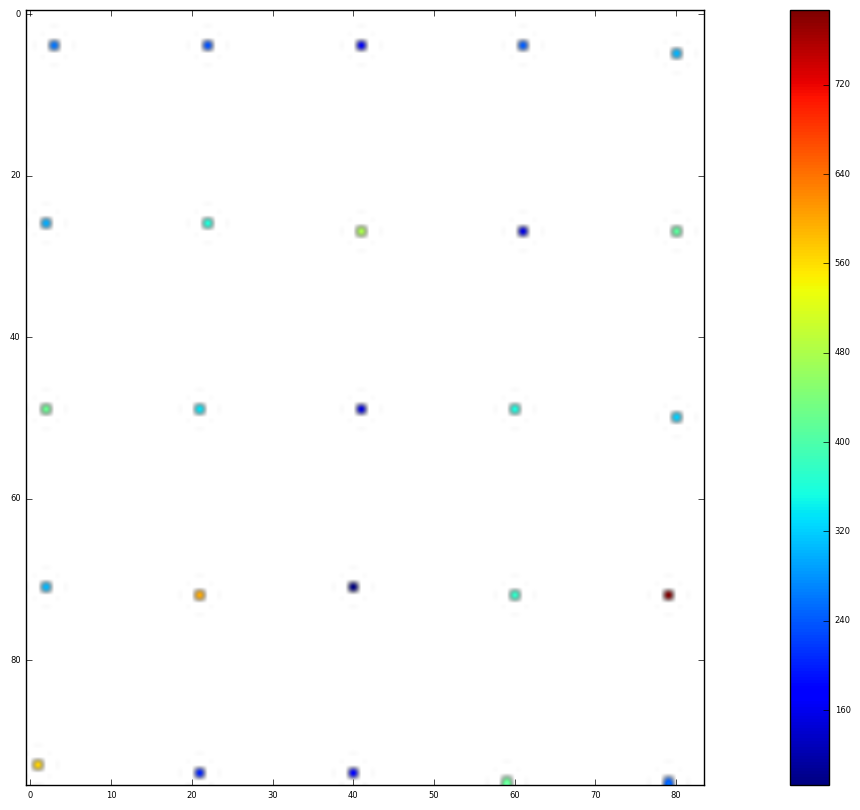

In [269]:
#plt.imshow(zdep) #,  interpolation='none')
plt.imshow(zdep,  interpolation='spline36')
plt.colorbar()

In [270]:
# 1)Tips lat-lon orientation: lat <=> north-south; y-coordinate; the first index of the Image2D(first, second)  

# 2) interpolation? image pixels
plt.imshow?

In [271]:

import scipy.interpolate as scipyinterp

In [272]:
xd= zdep.shape[0]
yd= zdep.shape[1]

x=np.zeros(xd)
y=np.zeros(yd)

for i in xrange(xd):
    x[i]=i
for j in xrange(yd):
    y[j]=j

print type(x)
print y

obj=scipyinterp.RectBivariateSpline(x, y, zdep)

<type 'numpy.ndarray'>
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.]


In [273]:
obj.get_coeffs()

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [274]:
zdep.shape

(96L, 84L)

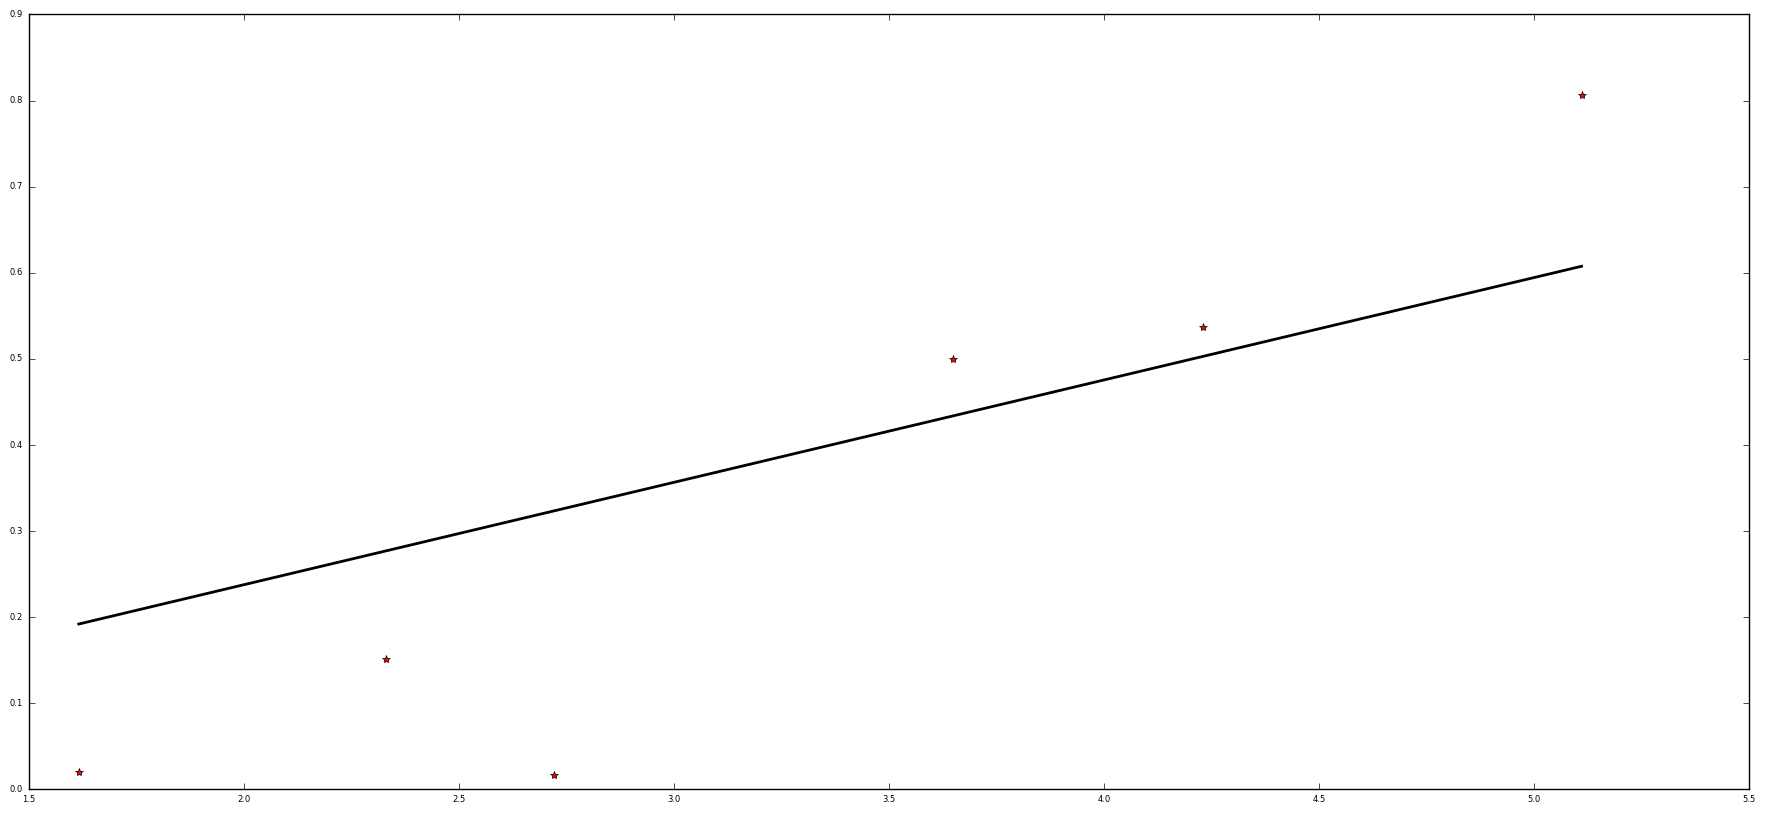

In [275]:
from pykrige.uk import UniversalKriging
import numpy as np

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. Variogram is handled as in the ordinary kriging case.
# drift_terms is a list of the drift terms to include; currently supported terms
# are 'regional_linear', 'point_log', and 'external_Z'. Refer to 
# UniversalKriging.__doc__ for more information.
UK = UniversalKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
                      drift_terms=['regional_linear'],enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)
z, ss = UK.execute('grid', gridx, gridy)

In [276]:
gridx

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [277]:
data[:,0]

array([ 0.3,  1.9,  1.1,  3.3,  4.7])

In [278]:
import pykrige.kriging_tools as kt
# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")

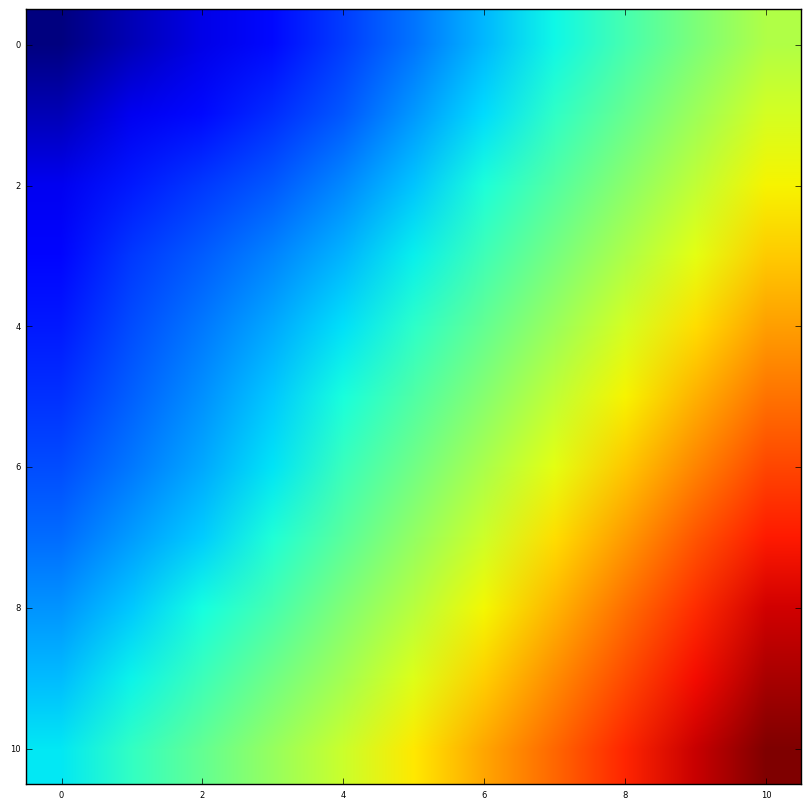

In [279]:
plt.imshow(z)

In [280]:
gridyy = np.arange(0.0, zdep.shape[0], 1.0)
gridxx = np.arange(0.0, zdep.shape[1], 1.0)

In [281]:
gridxx

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.])

In [282]:
datax=np.zeros(len(latlons))
datay=np.zeros(len(latlons))

dataz=np.zeros(len(latlons))


for iter, pair in enumerate(latlons):
    print pair
    (i,j)= get_index(pair[0], pair[1])
    datax[iter]=i
    datay[iter]=zdep.shape[0]-j
    dataz[iter] = np.abs(pendep[iter])

(-20.590083333333332, 136.77222222222224)
(0, 2)
(-20.591916666666666, 136.81136111111113)
(20, 1)
(-20.592444444444443, 136.85022222222221)
(39, 1)
(-20.59347222222222, 136.88919444444443)
(58, 0)
(-20.593694444444445, 136.92797222222222)
(78, 0)
(-20.546222222222223, 136.77325000000002)
(1, 24)
(-20.54677777777778, 136.81202777777779)
(20, 23)
(-20.546694444444444, 136.85102777777777)
(39, 24)
(-20.547444444444444, 136.8899722222222)
(59, 23)
(-20.54813888888889, 136.9288611111111)
(78, 23)
(-20.50111111111111, 136.77355555555556)
(1, 46)
(-20.50161111111111, 136.81283333333334)
(20, 46)
(-20.502027777777776, 136.8518611111111)
(40, 46)
(-20.502694444444444, 136.89052777777778)
(59, 46)
(-20.503138888888888, 136.92947222222222)
(79, 45)
(-20.456055555555555, 136.77477777777779)
(1, 69)
(-20.45647222222222, 136.81358333333336)
(21, 69)
(-20.456972222222223, 136.8523611111111)
(40, 68)
(-20.457833333333333, 136.89144444444443)
(60, 68)
(-20.45775, 136.93005555555555)
(79, 68)
(-20.4108

In [283]:
dataz

array([ 569.20278829,  201.43581518,  171.75273158,  419.5254147 ,
        246.5487687 ,  304.86981561,  597.0884437 ,   92.63881752,
        371.91521707,  786.42686526,  422.00196343,  335.06314601,
        150.89454247,  353.07444046,  321.15373322,  298.56826858,
        359.83942949,  478.0741405 ,  152.5259326 ,  409.85293516,
        258.10839011,  233.63228033,  164.23431973,  242.78370872,
        301.364085  ])

In [284]:
datay

array([ 93.,  94.,  94.,  95.,  95.,  71.,  72.,  71.,  72.,  72.,  49.,
        49.,  49.,  49.,  50.,  26.,  26.,  27.,  27.,  27.,   4.,   4.,
         4.,   4.,   5.])

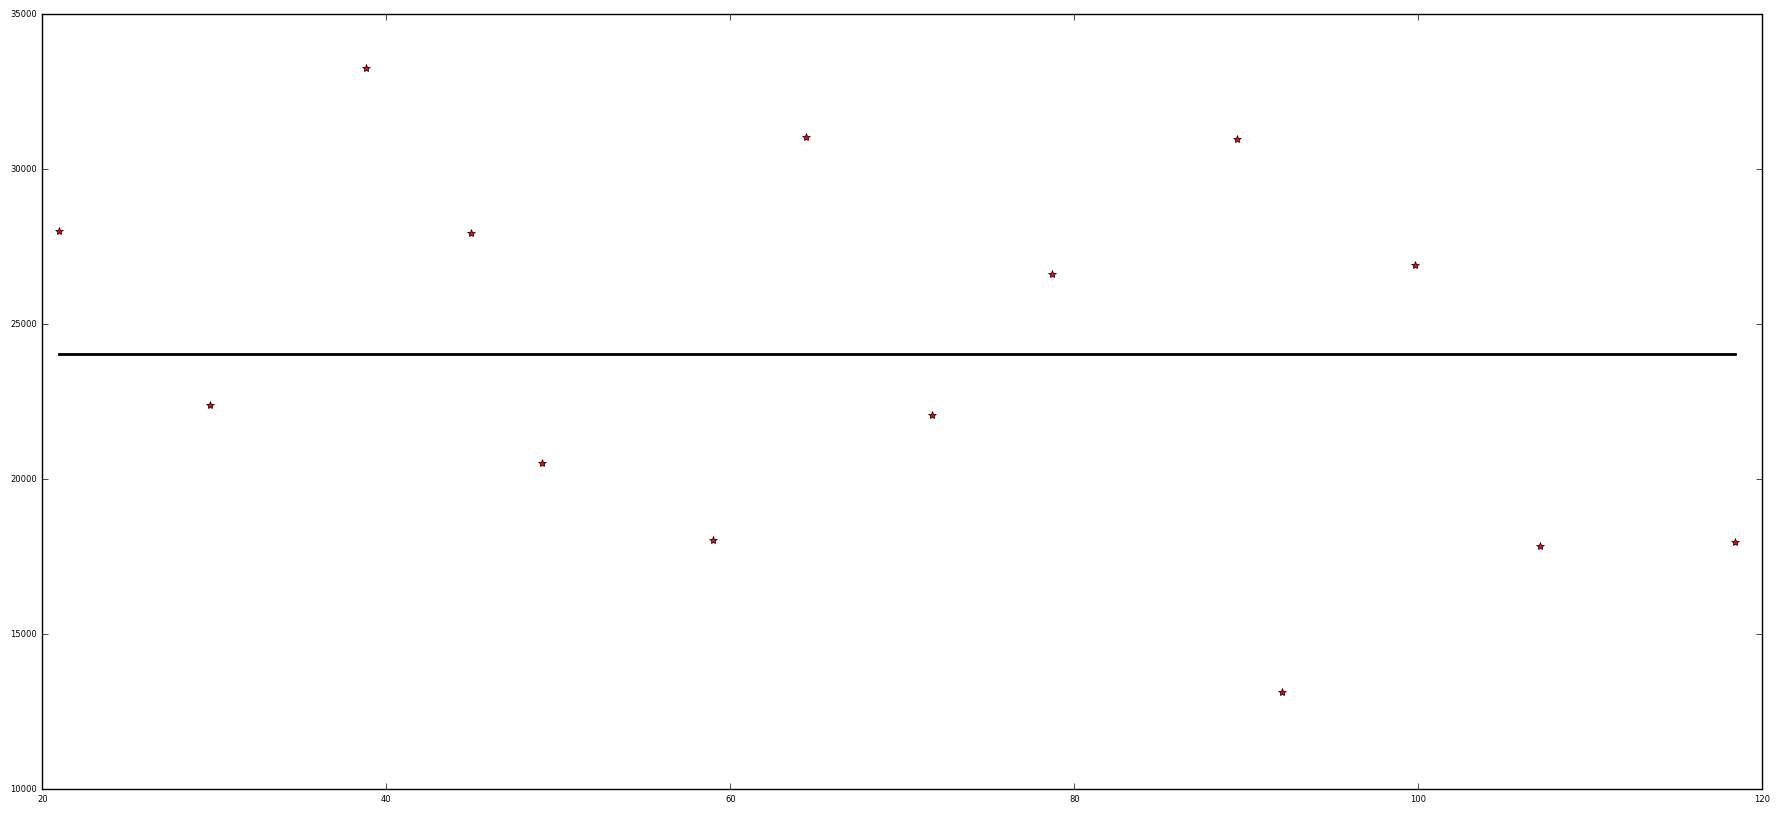

In [285]:
UK = UniversalKriging(datax, datay, dataz, variogram_model='linear', nlags=14,
                      drift_terms=['regional_linear'],enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)
z, ss = UK.execute('grid', gridxx, gridyy)

In [286]:
# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridxx, gridyy, z, filename="Pen_depth_interp_krigged.asc")

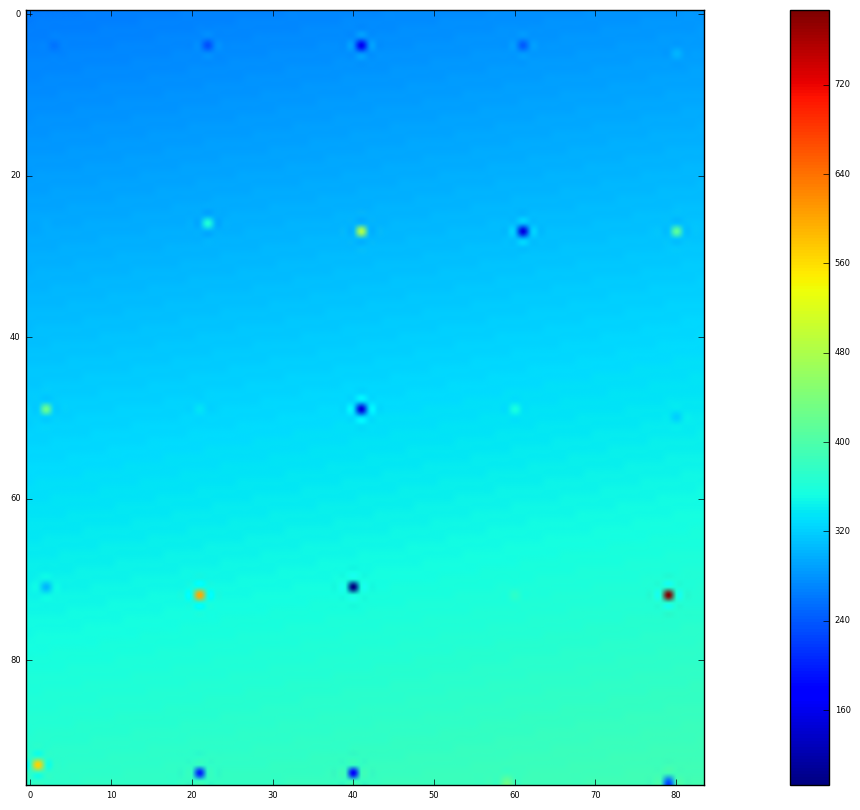

In [287]:
plt.imshow(z, interpolation='spline36')
plt.colorbar()

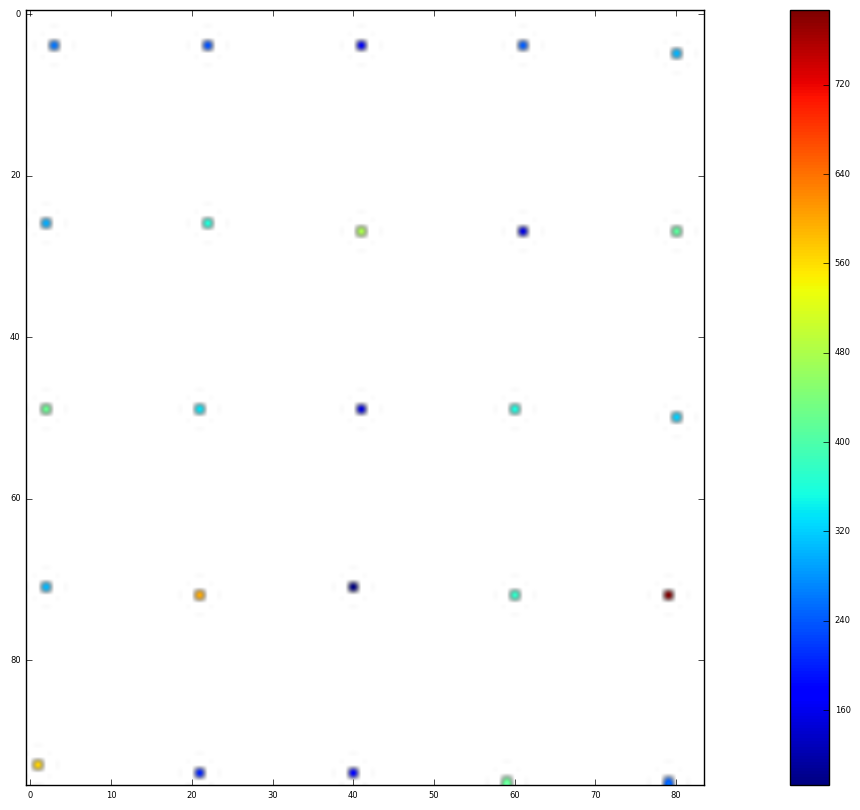

In [288]:
#plt.imshow(zdep) #,  interpolation='none')
plt.imshow(zdep,  interpolation='spline36')
plt.colorbar()

In [289]:
z

masked_array(data =
 [[264.73574212117273 264.9533879338509 265.1710337465295 ...,
  282.3650529481183 282.5826987607965 282.80034457347494]
 [265.87683354286736 266.0944793555457 266.31212516822393 ...,
  283.50614436981294 283.7237901824913 283.9414359951697]
 [267.01792496456176 267.23557077724 267.45321658991855 ...,
  284.6472357915074 284.8648816041857 285.08252741686425]
 ..., 
 [370.857244338767 569.2027882877827 371.2925359641238 ...,
  388.48655516571205 388.70420097839025 388.92184679106873]
 [371.9983357604618 372.21598157314025 372.43362738581845 ...,
  389.6276465874063 389.845292400085 390.0629382127633]
 [373.1394271821562 373.3570729948347 373.5747188075129 ...,
  390.7687380091009 390.9863838217792 391.2040296344577]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [Fal

In [290]:
# See https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np


def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


def demo_griddata():
    grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
    points = np.random.rand(1000, 2)
    values = func(points[:,0], points[:,1])


    grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
    grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
    grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


    plt.subplot(221)
    plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
    plt.plot(points[:,0], points[:,1], 'k.', ms=1)
    plt.title('Original')
    plt.subplot(222)
    plt.imshow(grid_z0.T,  extent=(0,1,0,1),origin='lower')
    plt.title('Nearest')
    plt.subplot(223)
    plt.imshow(grid_z1.T,extent=(0,1,0,1), origin='lower')
    plt.title('Linear')
    plt.subplot(224)
    plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
    plt.title('Cubic')
    plt.gcf().set_size_inches(6, 6)
    plt.show()


In [291]:
grid_x

grid_y.shape

points.shape

(25L, 2L)

(96L, 84L)
(0, 2)
(20, 1)
(39, 1)
(58, 0)
(78, 0)
(1, 24)
(20, 23)
(39, 24)
(59, 23)
(78, 23)
(1, 46)
(20, 46)
(40, 46)
(59, 46)
(79, 45)
(1, 69)
(21, 69)
(40, 68)
(60, 68)
(79, 68)
(2, 91)
(21, 91)
(40, 91)
(60, 91)
(79, 90)


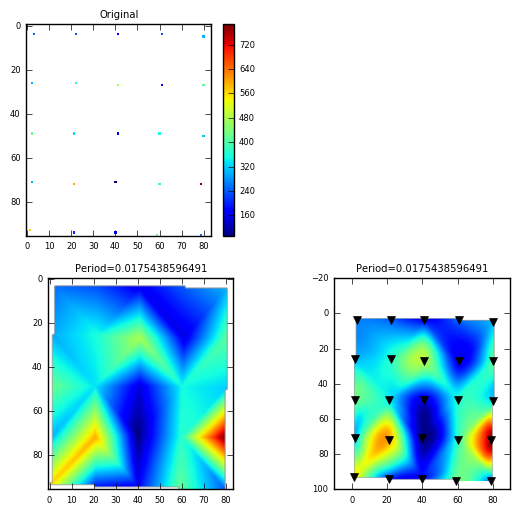

In [292]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

print(zdep.shape[0],zdep.shape[1])
grid_x, grid_y = np.mgrid[0:95:96j, 0:83:84j] # how to param this mesh construction ?

# print (grid_x, grid_y)
points = np.zeros((len(latlons), 2))
values = np.zeros( len(latlons) )

for iter, pair in enumerate(latlons):
#     print pair

    (i,j)= get_index(pair[0], pair[1])
    points[iter,0]=zdep.shape[0]-j
    points[iter,1]=i
    values[iter] = np.abs(pendep[iter])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


#plt.imshow(grid_z)

plt.subplot(221)
# plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
# plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.imshow(zdep,  interpolation='none')
#plt.colorbar()
plt.title('Original')
# plt.subplot(222)
plt.colorbar()
# plt.imshow(grid_z0,  origin='upper')
# plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1, origin='upper')
plt.title('Period=%s'%periods[0])
# plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2, origin='upper')
plt.plot( points[:,1], points[:,0], 'kv', markersize=6)
plt.title('Period=%s'%periods[0]) #Cubic
plt.gcf().set_size_inches(6, 6)

plt.show()


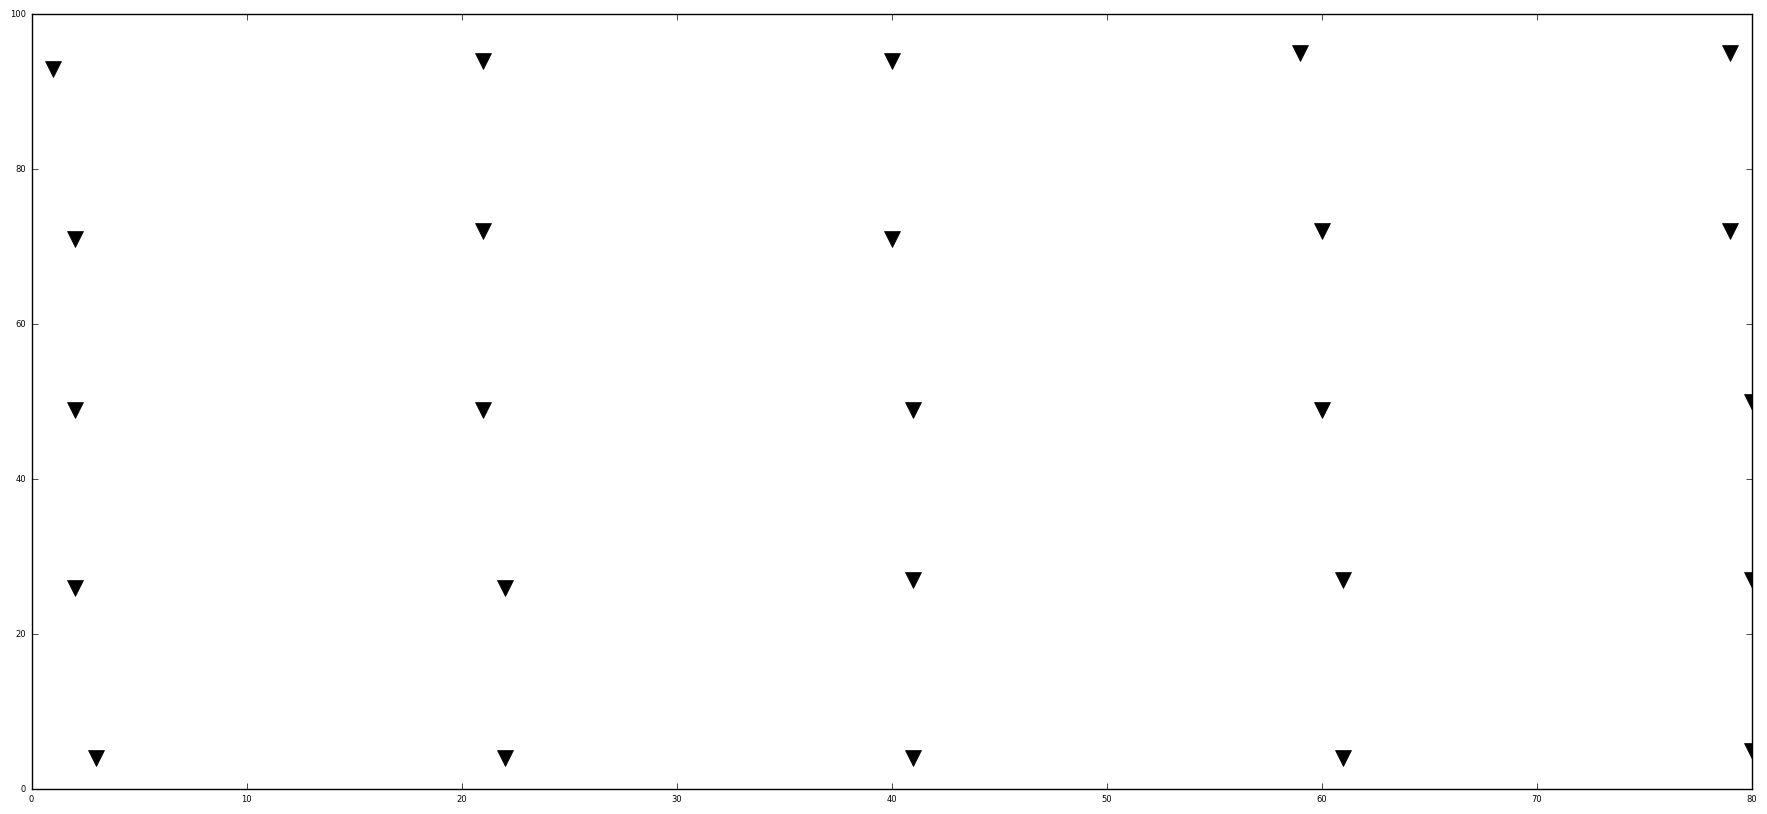

In [297]:
plt.plot( points[:,1], points[:,0], 'kv', markersize=12)

In [294]:
grid_x

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ..., 
       [ 93.,  93.,  93., ...,  93.,  93.,  93.],
       [ 94.,  94.,  94., ...,  94.,  94.,  94.],
       [ 95.,  95.,  95., ...,  95.,  95.,  95.]])

In [295]:
values


array([ 569.20278829,  201.43581518,  171.75273158,  419.5254147 ,
        246.5487687 ,  304.86981561,  597.0884437 ,   92.63881752,
        371.91521707,  786.42686526,  422.00196343,  335.06314601,
        150.89454247,  353.07444046,  321.15373322,  298.56826858,
        359.83942949,  478.0741405 ,  152.5259326 ,  409.85293516,
        258.10839011,  233.63228033,  164.23431973,  242.78370872,
        301.364085  ])

In [296]:
grid_z1

array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ..., 
       [          nan,  569.20278829,  551.71365015, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])